In [1]:
import tensorflow as tf
import matplotlib as mpl

Model 1.3: This is the model from project1 that I am now going to customize by editing the learning rate and adding more layers.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 250)               75250     
                                                                 
 dense_13 (Dense)            (None, 200)               50200     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                      

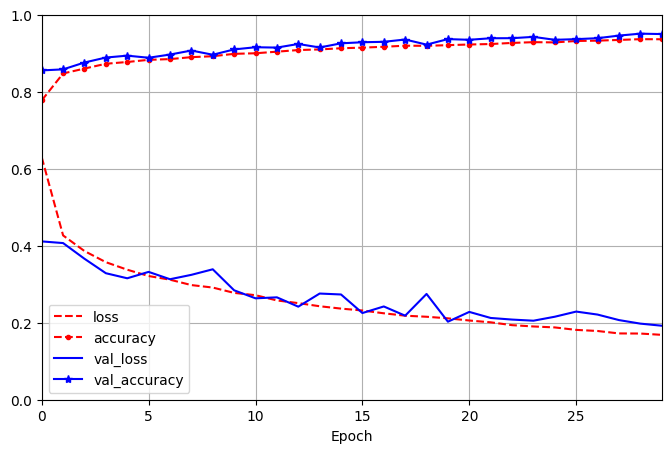

In [8]:
#Step 1 - Import the data
#Also split the data into training and test sets, also hold out the last 5000 images from training/testing
fashionMnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashionMnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[:-5000], y_train_full[:-5000]

#Step 2 - Create the neural net structure
#get_layer() and get_weights() to see layers and weight
tf.random.set_seed(42)
model1_3 = tf.keras.Sequential()
model1_3.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model1_3.add(tf.keras.layers.Flatten())
model1_3.add(tf.keras.layers.Dense(300, activation="relu"))
#batch normalization layer moved and moved another hidden layer between batch and dropout
model1_3.add(tf.keras.layers.BatchNormalization())
model1_3.add(tf.keras.layers.Dense(250, activation="relu"))
model1_3.add(tf.keras.layers.Dense(200, activation="relu"))
#dropout layer moved
model1_3.add(tf.keras.layers.Dropout(.2))
#more hidden layers
model1_3.add(tf.keras.layers.Dense(150, activation="relu"))
model1_3.add(tf.keras.layers.Dense(50, activation="relu"))
model1_3.add(tf.keras.layers.Dense(10, activation="softmax"))

model1_3.summary()

#Step 3 - Compile the model
model1_3.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

#Step 4 - Train and evaluate model
history1_3 = model1_3.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

#Step 5 - Check for overfitting and retest if needed (STOP HERE BASED ON ASSIGNMENT REQS)
mse_test, rmse_test = model1_3.evaluate(X_test, y_test)

#Step 6 - Visualize the data
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history1_3.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

Test 1: Model has a little overfitting which will hopefully be fixed with the customizations I make.

Model 2.1: I will now add more layers and edit the learning rate to try and fix the slight overfitting from model 1.3


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 batch_normalization (Batch  (None, 300)               1200      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 250)               75250     
                                                                 
 dense_2 (Dense)             (None, 200)               50200     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                       

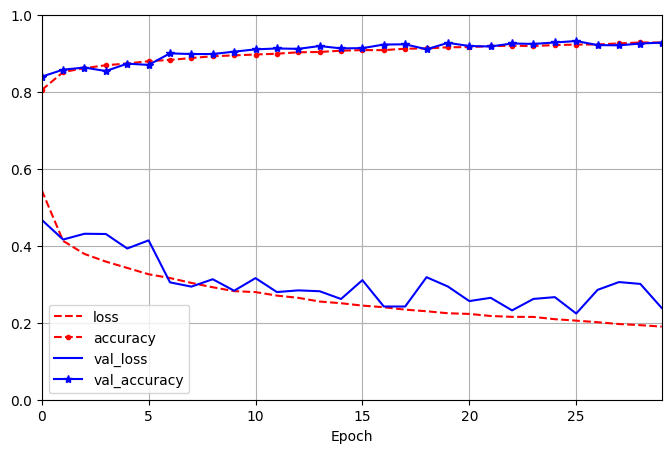

In [2]:
#Step 1 - Import the data
#Also split the data into training and test sets, also hold out the last 5000 images from training/testing
fashionMnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashionMnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[:-5000], y_train_full[:-5000]

#Step 2 - Create the neural net structure
#get_layer() and get_weights() to see layers and weight
tf.random.set_seed(42)
model2_1 = tf.keras.Sequential()
model2_1.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model2_1.add(tf.keras.layers.Flatten())
model2_1.add(tf.keras.layers.Dense(300, activation="relu"))
#batch normalization layer moved and moved another hidden layer between batch and dropout
model2_1.add(tf.keras.layers.BatchNormalization())
model2_1.add(tf.keras.layers.Dense(250, activation="relu"))
model2_1.add(tf.keras.layers.Dense(200, activation="relu"))
#dropout layer moved
model2_1.add(tf.keras.layers.Dropout(.2))
#more hidden layers
model2_1.add(tf.keras.layers.Dense(150, activation="relu"))
#added this layer
model2_1.add(tf.keras.layers.Dense(100, activation="relu"))
model2_1.add(tf.keras.layers.Dense(50, activation="relu"))
model2_1.add(tf.keras.layers.Dense(10, activation="softmax"))

model2_1.summary()

#Step 3 - Compile the model
#edited learning rate to .05 instead of .01
model2_1.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.05),
              metrics=["accuracy"])

#Step 4 - Train and evaluate model
history2_1 = model2_1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

#Step 5 - Check for overfitting and retest if needed (STOP HERE BASED ON ASSIGNMENT REQS)
mse_test, rmse_test = model2_1.evaluate(X_test, y_test)

#Step 6 - Visualize the data
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history2_1.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

Test 1: Adding an extra layer and changing the learning rate to .05 seems to have made the model MORE overfitted than before so I will try to increase the learning rate and see if that leads to more or less overfitting.

Model 2.2: I plan on increasing the learning rate to .1 to see if it helps with overfitting

In [ ]:
#Step 1 - Import the data
#Also split the data into training and test sets, also hold out the last 5000 images from training/testing
fashionMnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashionMnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[:-5000], y_train_full[:-5000]

#Step 2 - Create the neural net structure
#get_layer() and get_weights() to see layers and weight
tf.random.set_seed(42)
model2_2 = tf.keras.Sequential()
model2_2.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model2_2.add(tf.keras.layers.Flatten())
model2_2.add(tf.keras.layers.Dense(300, activation="relu"))
#batch normalization layer moved and moved another hidden layer between batch and dropout
model2_2.add(tf.keras.layers.BatchNormalization())
model2_2.add(tf.keras.layers.Dense(250, activation="relu"))
model2_2.add(tf.keras.layers.Dense(200, activation="relu"))
#dropout layer moved
model2_2.add(tf.keras.layers.Dropout(.2))
#more hidden layers
model2_2.add(tf.keras.layers.Dense(150, activation="relu"))
#added this layer
model2_2.add(tf.keras.layers.Dense(100, activation="relu"))
model2_2.add(tf.keras.layers.Dense(50, activation="relu"))
model2_2.add(tf.keras.layers.Dense(10, activation="softmax"))

model2_2.summary()

#Step 3 - Compile the model
#edited learning rate to .1 instead of .05
model2_2.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.1),
              metrics=["accuracy"])

#Step 4 - Train and evaluate model
history2_2 = model2_2.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

#Step 5 - Check for overfitting and retest if needed (STOP HERE BASED ON ASSIGNMENT REQS)
mse_test, rmse_test = model2_1.evaluate(X_test, y_test)

#Step 6 - Visualize the data
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history2_2.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()